In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import requests

key = 'bddce407bed5be81579bfe0faaaa9e9d6626dae1'
symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-07-08'
url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}'

headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {key}'
}

response = requests.get(url, headers=headers)
data = response.json()

df = pd.DataFrame(data)

In [6]:
df.to_csv('TSLA.csv')

In [7]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-01-02T00:00:00.000Z,430.26,430.70,421.71,424.50,9558386,28.684000,28.713333,28.114000,28.300000,143375790,0.0,1.0
1,2020-01-03T00:00:00.000Z,443.01,454.00,436.92,440.50,17794697,29.534000,30.266667,29.128000,29.366667,266920455,0.0,1.0
2,2020-01-06T00:00:00.000Z,451.54,451.56,440.00,440.47,10157499,30.102667,30.104000,29.333333,29.364667,152362485,0.0,1.0
3,2020-01-07T00:00:00.000Z,469.06,471.63,453.36,461.40,18209138,31.270667,31.442000,30.224000,30.760000,273137070,0.0,1.0
4,2020-01-08T00:00:00.000Z,492.14,498.49,468.23,473.70,31199393,32.809333,33.232667,31.215333,31.580000,467990895,0.0,1.0


In [8]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1130,2024-07-01T00:00:00.000Z,209.86,213.230,200.8500,201.02,135691395,209.86,213.230,200.8500,201.02,135691395,0.0,1.0
1131,2024-07-02T00:00:00.000Z,231.26,231.300,218.0600,218.89,205047920,231.26,231.300,218.0600,218.89,205047920,0.0,1.0
1132,2024-07-03T00:00:00.000Z,246.39,248.350,234.2500,234.56,166561471,246.39,248.350,234.2500,234.56,166561471,0.0,1.0
1133,2024-07-05T00:00:00.000Z,251.52,252.370,242.4601,249.81,154501152,251.52,252.370,242.4601,249.81,154501152,0.0,1.0
1134,2024-07-08T00:00:00.000Z,252.94,259.439,244.5700,247.71,157219580,252.94,259.439,244.5700,247.71,157219580,0.0,1.0


In [9]:
df=pd.read_csv('TSLA.csv')

In [10]:
df1=df.reset_index()['close']
df2=df.reset_index()['open']

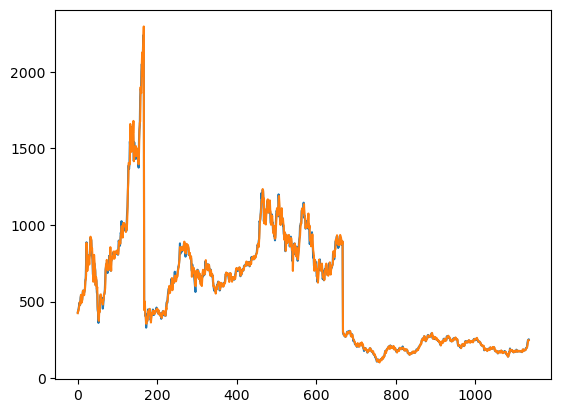

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.plot(df2)

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1135, 1)

In [14]:
df1

array([[0.15120268],
       [0.15718677],
       [0.16119025],
       ...,
       [0.06490508],
       [0.06731279],
       [0.06797926]])

In [15]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [16]:

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1): # Fixed indentation here
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [3]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/376.0 MB 4.8 MB/s eta 0:01:19
   ---------------------------------------- 1.8/376.0 MB 4.0 MB/s eta 0:01:34
   ---------------------------------------- 3.7/376.0 MB 5.5 MB/s eta 0:01:09
    --------------------------------------- 5.5/376.0 MB 6.2 MB/s eta 0:01:00
    --------------------------------------- 7.3/376.0 MB 6.8 MB/s eta 0:00:55
    --------------------------------------- 9.2/376.0 MB 7.0 MB/s eta 0:00:53
   - -------------------------------------- 10.7/376.0 MB 7.2 MB/s eta 0:00:51
   - -------------------------------------- 12.6/376.0 MB 7.3 MB/s eta 0:00:50
   - -------------------------------------- 14.2/376.0 MB 7.4 MB/s eta 0:00:49
   - -------------------------------------- 15.7/376.0 MB 7.5 MB/s eta 0:00:49
   - -------------------------------------- 17.8/376.0 MB 7.6 MB/s eta 0:0

In [19]:
#create the LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\shivt\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0346 - val_loss: 0.0046
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0116 - val_loss: 0.0085
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0097 - val_loss: 0.0015
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0081 - val_loss: 3.8118e-04
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0075 - val_loss: 3.3038e-04
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0070 - val_loss: 5.2344e-04
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0064 - val_loss: 2.8051e-04
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0063 - val_loss: 6.4434e-05
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0069 - val_loss: 1.7015e-04
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0067 - val_loss: 6.8429e-05
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0056 - val_loss: 4.2529e-04
Epoch 12/100
11/11 ━

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

835.2340270780248

In [31]:
math.sqrt(mean_squared_error(y_test,test_predict))


209.76736973436348

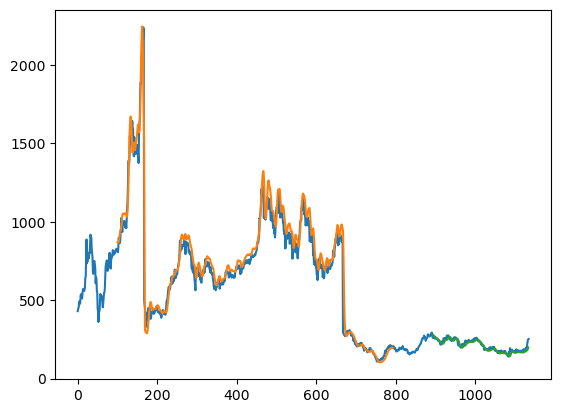

In [32]:
# Plotting

look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)-100

241

In [34]:
### Predict the future 30 days

x_input=test_data[241:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)



[0.05279353]
101
1 day input [0.03783352 0.04334358 0.04310891 0.04020369 0.04067773 0.04191679
 0.03936357 0.04285077 0.04300566 0.04408983 0.04401474 0.04437144
 0.037566   0.03409288 0.03212165 0.03311196 0.03155844 0.03269894
 0.03259099 0.02880811 0.02553211 0.02603431 0.03083566 0.0296717
 0.03170863 0.03037571 0.02944172 0.03028653 0.03265201 0.03366578
 0.03176965 0.03150212 0.02747049 0.02829184 0.02957313 0.02665853
 0.0304508  0.03228123 0.02987821 0.03121113 0.02954497 0.02505339
 0.02300237 0.02222327 0.01963251 0.01828081 0.0159341  0.01716847
 0.02535846 0.02913665 0.0282496  0.0403398  0.03528501 0.03374088
 0.03375026 0.03430409 0.03597963 0.03271772 0.03126745 0.02997677
 0.02833408 0.02993922 0.03259569 0.03092484 0.03132377 0.03255345
 0.0313754  0.03684322 0.0337972  0.0308075  0.03338887 0.03222021
 0.03195738 0.03317767 0.03284444 0.03200432 0.03129092 0.03139887
 0.03277873 0.03256283 0.03083097 0.02936193 0.03247366 0.03490484
 0.03281158 0.03723746 0.03602656 

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt
len(df1)

1135

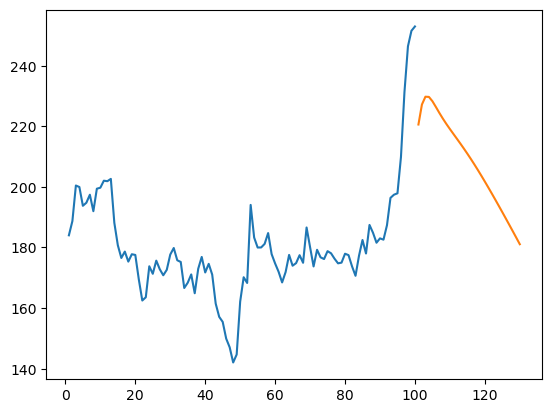

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(day_new,scaler.inverse_transform(df1[1035:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))